<a href="https://colab.research.google.com/github/Joaom123/huawei-hcia-ia-ifce/blob/main/RegressionAssigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 01**

For this assigment, we will use the following dataset: "[House Sales in King County, USA
](https://www.kaggle.com/harlfoxem/housesalesprediction)".

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/llSourcell/math_of_machine_learning/master/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


For this problem the goal is to predict the **house price** using only its **area**. Let's get this data. 

In [ ]:
area = data['sqft_living'].to_numpy().reshape(-1, 1)  # predictor
price = data['price'].to_numpy().reshape(-1, 1)       # target 

First we will separate the data in two parts, one for training (X_train, y_train) and one for testing (X_test, y_test).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(area, price, test_size=0.50, random_state=7)

Text(0, 0.5, 'y')

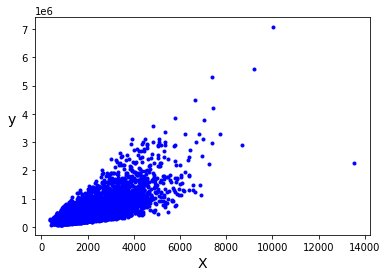

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, 'b.')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Text(0, 0.5, 'y')

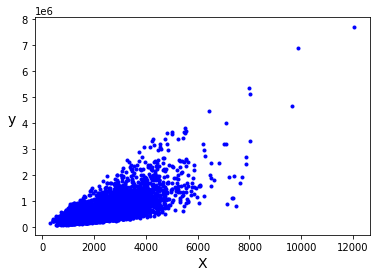

In [ ]:
plt.plot(X_test, y_test, 'b.')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Here is a simple example on how to build a model and evaluate its performance.

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_test_predicted = LR.predict(X_test)

Text(0, 0.5, 'y')

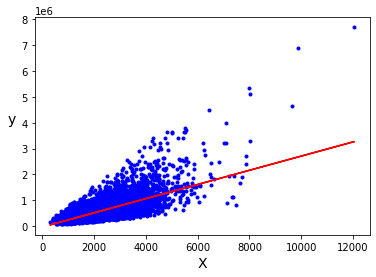

In [ ]:
plt.plot(X_test, y_test, 'b.')
plt.plot(X_test, y_test_predicted, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

We will use two metrics to evaluate the model's performance: $R^2$ (**r-squared**) and **root mean square error** (RMSE).

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_test_predicted)             
RMSE = np.sqrt( mean_squared_error(y_test, y_test_predicted) )

print("R2: \t %2.4f" % r2)
print("RMSE: \t %2.4f" % RMSE)

R2: 	 0.4967
RMSE: 	 265820.2819


**Now it is your turn**. 

Build one or more regression models and see how well they perform.

R2: 	 0.4966
RMSE: 	 265840.4982


Text(0, 0.5, 'y')

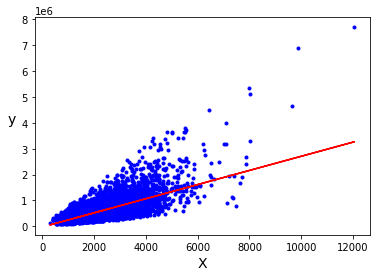

In [ ]:
## Build and evaluate your models here.
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


SGD = SGDRegressor(
    tol=1e-6,
    eta0=0.01,
    penalty=None
)

SGD = make_pipeline(StandardScaler(), SGD)


SGD.fit(X_train, np.ravel(y_train))
y_pred_sgd = SGD.predict(X_test)

r2 = r2_score(y_test, y_pred_sgd)    
         
RMSE = np.sqrt(
    mean_squared_error(y_test, y_pred_sgd)
)

print("R2: \t %2.4f" % r2)
print("RMSE: \t %2.4f" % RMSE)

plt.plot(X_test, y_test, 'b.')
plt.plot(X_test, y_pred_sgd, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

R2: 	 0.4967
RMSE: 	 265820.2819


Text(0, 0.5, 'y')

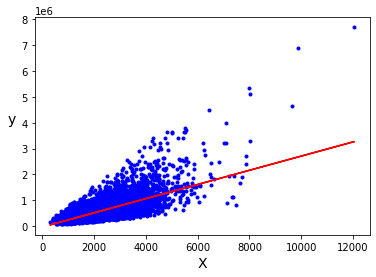

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

RidgeLR = Ridge(solver='cholesky') # closed-form solution
RidgeLR.fit(X_train, y_train)
y_pred_ridge = RidgeLR.predict(X_test)

r2 = r2_score(y_test, y_pred_ridge)    
         
RMSE = np.sqrt(
    mean_squared_error(y_test, y_pred_ridge)
)

print("R2: \t %2.4f" % r2)
print("RMSE: \t %2.4f" % RMSE)

plt.plot(X_test, y_test, 'b.')
plt.plot(X_test, y_pred_ridge, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

R2: 	 0.4977
RMSE: 	 265565.8863


Text(0, 0.5, 'y')

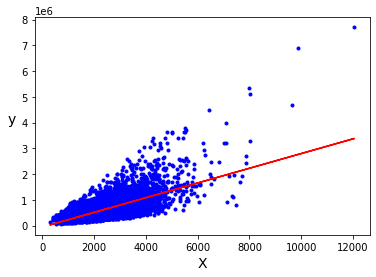

In [ ]:
# Lasso Regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


Lasso = SGDRegressor(
    max_iter=1000, 
    tol=1e-6, 
    eta0=0.01, 
    penalty='l2', 
    alpha=0.01, 
    random_state=7
)

Lasso = make_pipeline(StandardScaler(), Lasso)

Lasso.fit(X_train, np.ravel(y_train))
y_pred_lasso = Lasso.predict(X_test)

r2 = r2_score(y_test, y_pred_lasso)    
         
RMSE = np.sqrt(
    mean_squared_error(y_test, y_pred_lasso)
)

print("R2: \t %2.4f" % r2)
print("RMSE: \t %2.4f" % RMSE)

plt.plot(X_test, y_test, 'b.')
plt.plot(X_test, y_pred_lasso, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

## **Problem 02**

For this second problem we will use the **Boston house prices dataset**. Let's load the data and have a look at the dataset description.

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The goal here is again to predict the price of a house, but now you are free to use all predictors variables. Since this is a small dataset, we will use 80% of the dataset for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)

**Your turn**: Use the training data to build one or more regression models, then evaluate their performances on the test data.

In [ ]:
## Build and evaluate your models here.